InferenceAPI

**질문답변**

In [4]:
import requests

API_URL = "https://api-inference.huggingface.co/models/deepset/roberta-base-squad2"
headers = {"Authorization": f"Bearer {token}"}

def query(payload):
	response = requests.post(API_URL, headers=headers, json=payload)
	return response.json()
	
output = query({
	"inputs": {
	"question": "What is my name?",
	"context": "My name is Clara and I live in Berkeley."
},
})

print(output)

{'score': 0.9331294298171997, 'start': 11, 'end': 16, 'answer': 'Clara'}


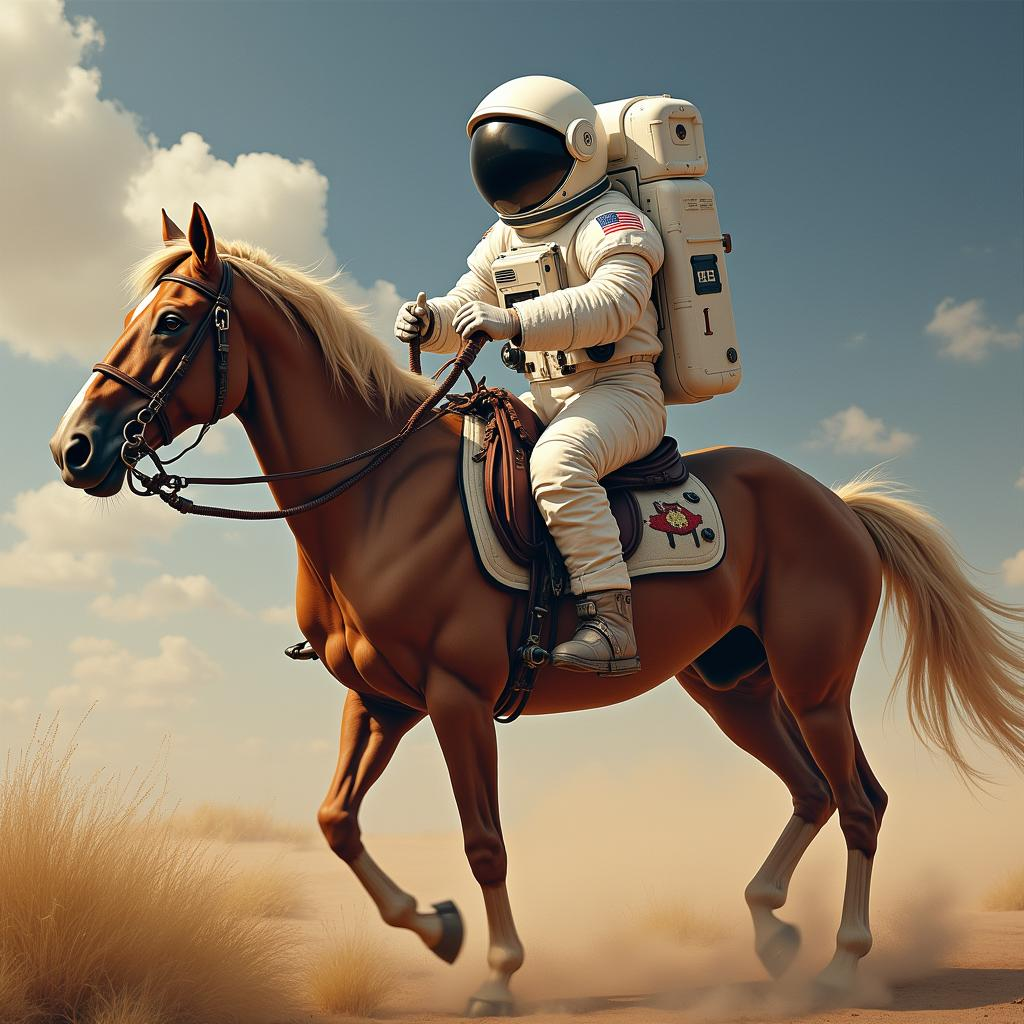

In [3]:
import requests

API_URL = "https://api-inference.huggingface.co/models/black-forest-labs/FLUX.1-dev"
headers = {"Authorization": f"Bearer {token}"}

def query(payload):
	response = requests.post(API_URL, headers=headers, json=payload)
	return response.content
image_bytes = query({
	"inputs": "Astronaut riding a horse",
})
# You can access the image with PIL.Image for example
import io
from PIL import Image
image = Image.open(io.BytesIO(image_bytes))

image

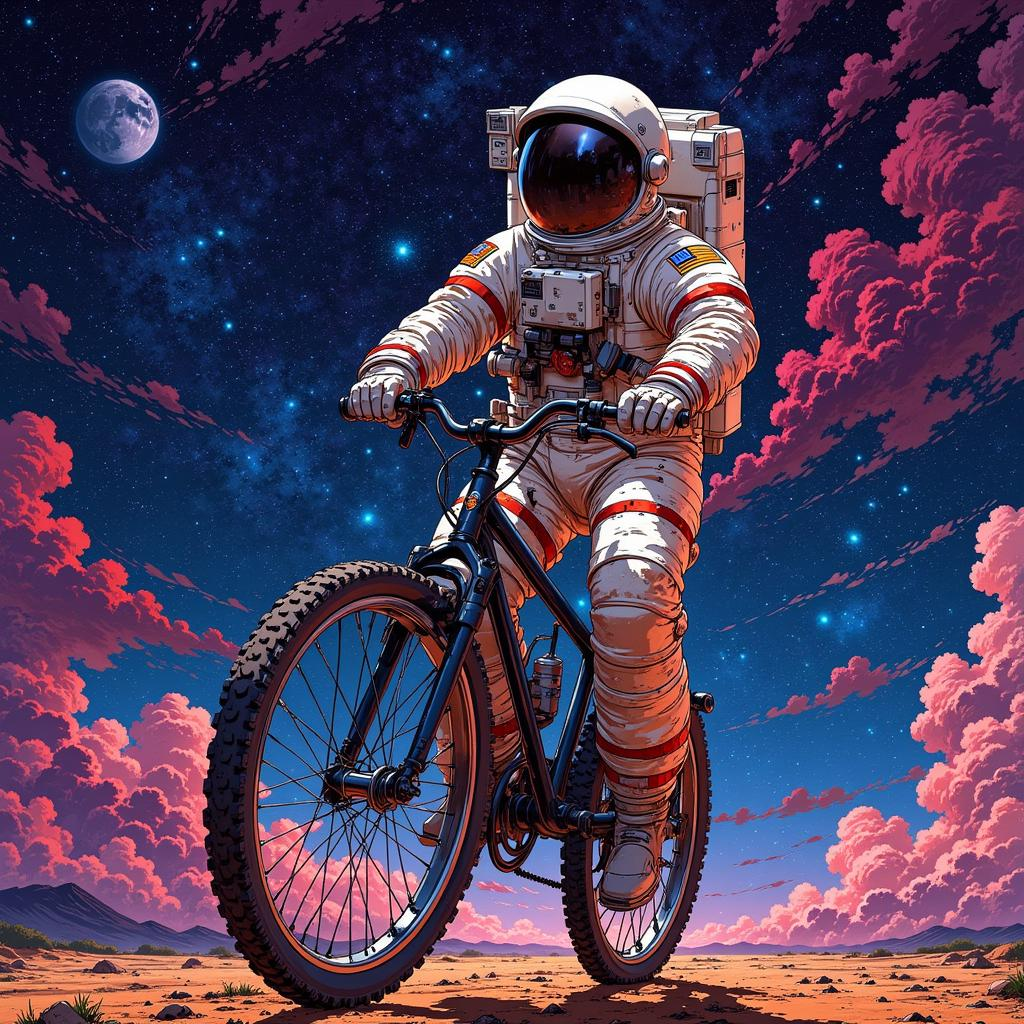

In [8]:
import requests

API_URL = "https://api-inference.huggingface.co/models/aleksa-codes/flux-ghibsky-illustration"
headers = {"Authorization": f"Bearer {token}"}

def query(payload):
	response = requests.post(API_URL, headers=headers, json=payload)
	return response.content
image_bytes = query({
	"inputs": "astronauts are riding bicycles in space",
})
# You can access the image with PIL.Image for example
import io
from PIL import Image
image = Image.open(io.BytesIO(image_bytes))

image

In [ ]:
import huggingface_hub

huggingface_hub.login()

In [10]:
# 사용자가 입력한 값
text = '인공지능을 공부하는 학생들'

from transformers import MBartForConditionalGeneration, MBart50TokenizerFast

article_ko = "인공지능을 공부하는 학생들"

# 번역 모델 불러오기
model = MBartForConditionalGeneration.from_pretrained("facebook/mbart-large-50-many-to-many-mmt")
# 번역 모델에서 사용할 토크나이저 가져오기
tokenizer = MBart50TokenizerFast.from_pretrained("facebook/mbart-large-50-many-to-many-mmt")

# 전처리
# translate Hindi to French
tokenizer.src_lang = "ko_KR"

# 한글 토크나이징
encoded_ko = tokenizer(article_ko, return_tensors="pt")

# 추론
generated_tokens = model.generate(
    **encoded_ko,
    forced_bos_token_id=tokenizer.lang_code_to_id["en_XX"]
)

print(generated_tokens)
# translated_text = tokenizer.batch_decode(generated_tokens, skip_special_tokens=True)

ImportError: 
 requires the protobuf library but it was not found in your environment. Checkout the instructions on the
installation page of its repo: https://github.com/protocolbuffers/protobuf/tree/master/python#installation and follow the ones
that match your environment. Please note that you may need to restart your runtime after installation.


In [24]:
!pip install sentencepiece

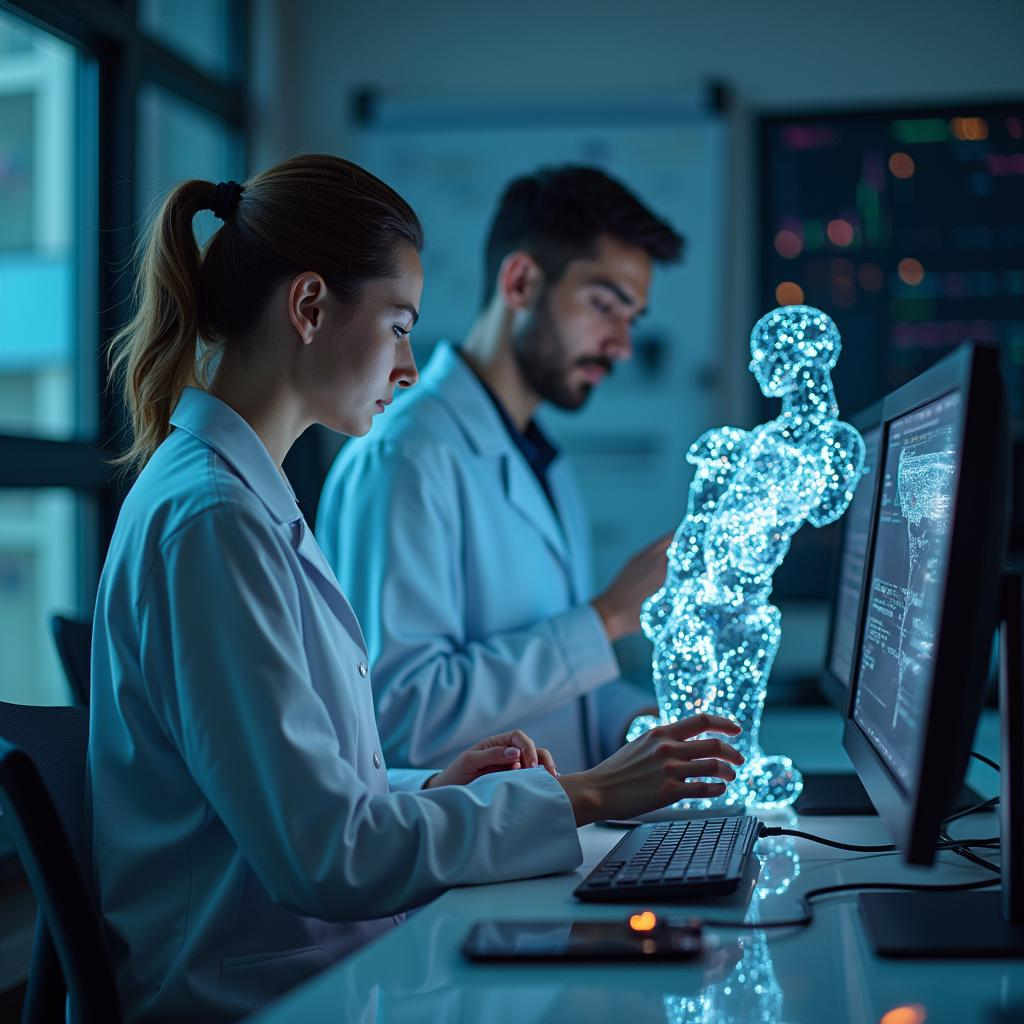

In [5]:
from transformers import pipeline

translator = pipeline("translation", model="Helsinki-NLP/opus-mt-ko-en")

result = translator("인공지능을 공부하는 학생들")

translated_text = result[0]['translation_text']

#번역 결과
translated_text

import requests

API_URL = "https://api-inference.huggingface.co/models/aleksa-codes/flux-ghibsky-illustration"
headers = {"Authorization": f"Bearer {token}"}

def query(payload):
	response = requests.post(API_URL, headers=headers, json=payload)
	return response.content
image_bytes = query({
	"inputs": translated_text,
})
# You can access the image with PIL.Image for example
import io
from PIL import Image
image = Image.open(io.BytesIO(image_bytes))

image

 